In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

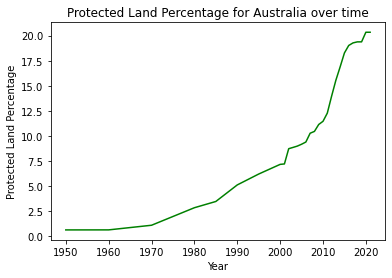

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
protected_df = pd.read_csv('protected_land_cleaned.csv')
country = 'Australia'
australia_df = protected_df[protected_df['Country'] == country]
australia_df = australia_df.reset_index(drop=True)
plt.plot(australia_df['Year'], australia_df['Value'], c='g')
plt.xlabel('Year')
plt.ylabel('Protected Land Percentage')
plt.title(f'Protected Land Percentage for {country} over time')
plt.show()

In [24]:
protected_percent_change = []
for i in range(1, len(australia_df)):
    percent_change = (australia_df['Value'].iloc[i] - australia_df['Value'].iloc[i-1]) / australia_df['Value'].iloc[i-1]
    protected_percent_change.append(percent_change)

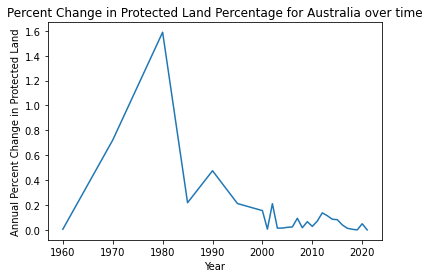

In [26]:
# plot the percent change
plt.plot(australia_df['Year'].tail(len(australia_df)-1), protected_percent_change)
plt.xlabel('Year')
plt.ylabel('Annual Percent Change in Protected Land')
plt.title(f'Percent Change in Protected Land Percentage for {country} over time')
plt.show()

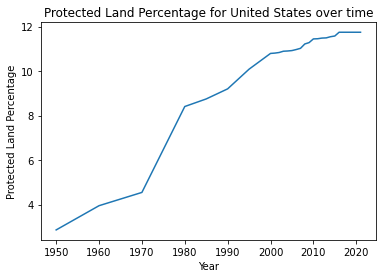

In [28]:
# repeat analysis with USA
country = 'United States'
us_df = protected_df[protected_df['Country'] == country]
us_df = us_df.reset_index(drop=True)
plt.plot(us_df['Year'], us_df['Value'])
plt.xlabel('Year')
plt.ylabel('Protected Land Percentage')
plt.title(f'Protected Land Percentage for {country} over time')
plt.show()

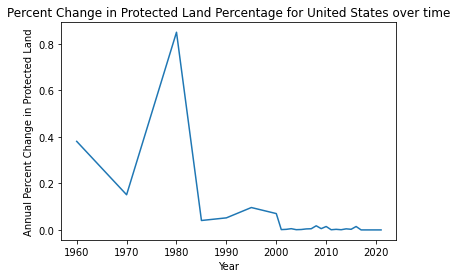

In [29]:
# US percent change
us_protected_percent_change = []
for i in range(1, len(us_df)):
    percent_change = (us_df['Value'].iloc[i] - us_df['Value'].iloc[i-1]) / us_df['Value'].iloc[i-1]
    us_protected_percent_change.append(percent_change)
    
# plot the percent change
plt.plot(us_df['Year'].tail(len(us_df)-1), us_protected_percent_change)
plt.xlabel('Year')
plt.ylabel('Annual Percent Change in Protected Land')
plt.title(f'Percent Change in Protected Land Percentage for {country} over time')
plt.show()

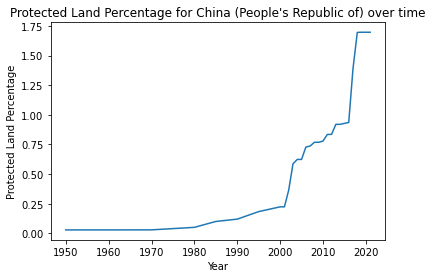

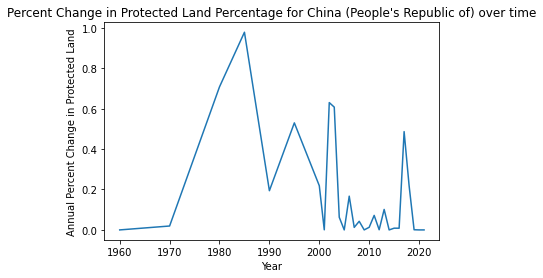

In [31]:
# repeat analysis for China
country = "China (People's Republic of)"
china_df = protected_df[protected_df['Country'] == country]
china_df = china_df.reset_index(drop=True)
plt.plot(china_df['Year'], china_df['Value'])
plt.xlabel('Year')
plt.ylabel('Protected Land Percentage')
plt.title(f'Protected Land Percentage for {country} over time')
plt.show()

# China percent change
china_protected_percent_change = []
for i in range(1, len(china_df)):
    percent_change = (china_df['Value'].iloc[i] - china_df['Value'].iloc[i-1]) / china_df['Value'].iloc[i-1]
    china_protected_percent_change.append(percent_change)
    
# plot the percent change
plt.plot(china_df['Year'].tail(len(china_df)-1), china_protected_percent_change)
plt.xlabel('Year')
plt.ylabel('Annual Percent Change in Protected Land')
plt.title(f'Percent Change in Protected Land Percentage for {country} over time')
plt.show()

In [102]:
# get the new WoS data that was found usin keyword "biodiversity"
biodiversity_df = pd.read_csv('land_biodiversity_research.csv')

In [20]:
australia_research_df = pd.read_csv('Australia_biodiversity_research.csv')
australia_research_example = australia_research_df.iloc[:1]
australia_research_example = australia_research_example.dropna(axis=1)
australia_research_example = australia_research_example.drop(columns=['Unnamed: 0'])
print(australia_research_example.columns)

Index(['Publication Type', 'Authors', 'Author Full Names', 'Article Title',
       'Source Title', 'Language', 'Document Type', 'Author Keywords',
       'Keywords Plus', 'Abstract', 'Addresses', 'Reprint Addresses',
       'Email Addresses', 'Researcher Ids', 'ORCIDs', 'Funding Orgs',
       'Funding Text', 'Cited Reference Count', 'Times Cited, WoS Core',
       'Times Cited, All Databases', '180 Day Usage Count',
       'Since 2013 Usage Count', 'Publisher', 'Publisher City',
       'Publisher Address', 'ISSN', 'eISSN', 'Journal Abbreviation',
       'Journal ISO Abbreviation', 'Publication Date', 'Publication Year',
       'Volume', 'Issue', 'Start Page', 'End Page', 'DOI', 'Number of Pages',
       'WoS Categories', 'Web of Science Index', 'Research Areas',
       'IDS Number', 'UT (Unique WOS ID)', 'Open Access Designations'],
      dtype='object')


C:\Users\btiv\AppData\Local\Temp/ipykernel_1720/2599053115.py:1: DtypeWarning: Columns (51) have mixed types. Specify dtype option on import or set low_memory=False.
  australia_research_df = pd.read_csv('Australia_biodiversity_research.csv')


In [71]:
# get paper count by year
australia_year_counts = australia_research_df['Publication Year'].value_counts()

In [15]:
australia_research_df['Email Addresses']

0                               w.sutherland@zoo.cam.ac.uk
1                                   davidl@cres.anu.edu.au
2                 barry.brook@ntu.edu.au; dbsns@nus.edu.sg
3                                                      NaN
4                                l.wortley@griffith.edu.au
                               ...                        
14305    filip.kuzmic@zrc-sazu.si; lososova@sci.muni.cz...
14306                          jay-ram.lamichhane@inrae.fr
14307                              amanda.padovan@csiro.au
14308         apaudel2017@fau.edu; sk.ghimire@cdbtu.edu.np
14309                                                  NaN
Name: Email Addresses, Length: 14310, dtype: object

In [76]:
australia_year_counts = australia_year_counts.sort_index()

In [85]:
# drop 2022
australia_year_counts.index[:len(australia_year_counts)-1]

Float64Index([1990.0, 1992.0, 1994.0, 1995.0, 1996.0, 1997.0, 1998.0, 1999.0,
              2000.0, 2001.0, 2002.0, 2003.0, 2004.0, 2005.0, 2006.0, 2007.0,
              2008.0, 2009.0, 2010.0, 2011.0, 2012.0, 2013.0, 2014.0, 2015.0,
              2016.0, 2017.0, 2018.0, 2019.0, 2020.0, 2021.0],
             dtype='float64')

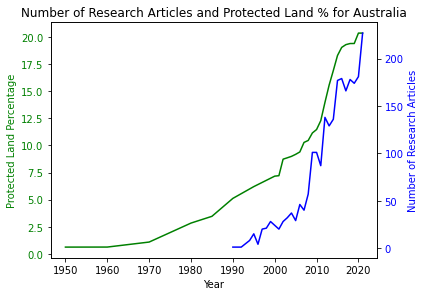

In [89]:
fig, ax1 = plt.subplots()

ax1.set_xlabel('Year')
ax1.set_ylabel('Protected Land Percentage', color='g')
ax1.plot(australia_df['Year'], australia_df['Value'], color='g', label='Protected Land')
ax1.tick_params(axis='y', labelcolor='g')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'b'
ax2.set_ylabel('Number of Research Articles', color=color)  # we already handled the x-label with ax1
ax2.plot(australia_year_counts.index[:len(australia_year_counts)-1], australia_year_counts.values[:len(australia_year_counts)-1], color='b', label='Research Articles')
ax2.tick_params(axis='y', labelcolor='b')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
ax2.set_title('Number of Research Articles and Protected Land % for Australia')
plt.show()

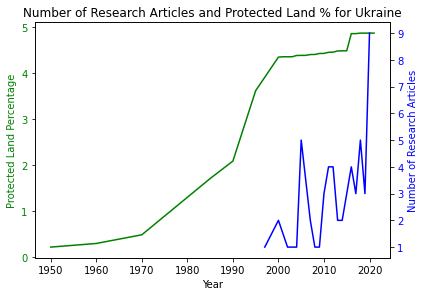

In [94]:
# repeat with Ukraine
country = "Ukraine"
ukraine_df = protected_df[protected_df['Country'] == country]
ukraine_df = ukraine_df.reset_index(drop=True)
ukraine_research_df = pd.read_csv("Ukraine_biodiversity_research.csv")
ukraine_year_counts = ukraine_research_df['Publication Year'].value_counts()
ukraine_year_counts = ukraine_year_counts.sort_index()

fig, ax1 = plt.subplots()

ax1.set_xlabel('Year')
ax1.set_ylabel('Protected Land Percentage', color='g')
ax1.plot(ukraine_df['Year'], ukraine_df['Value'], color='g', label='Protected Land')
ax1.tick_params(axis='y', labelcolor='g')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'b'
ax2.set_ylabel('Number of Research Articles', color=color)  # we already handled the x-label with ax1
ax2.plot(ukraine_year_counts.index[:len(ukraine_year_counts)-1], ukraine_year_counts.values[:len(ukraine_year_counts)-1], color='b', label='Research Articles')
ax2.tick_params(axis='y', labelcolor='b')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
ax2.set_title('Number of Research Articles and Protected Land % for Ukraine')
plt.show()